# Map Density of Green Sites in Oxfordshire using hexbins
Green Sites data from:
https://www.ordnancesurvey.co.uk/business-and-government/products/os-open-greenspace.html

Contains Ordnance Survey data © Crown copyright and database right 2018

Workflow derived from:
https://sensitivecities.com/so-youd-like-to-make-a-map-using-python-EN.html

import pandas as pd
import geopandas as gpd
from geopandas.tools import sjoin
from fiona.crs import from_epsg
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_wards = gpd.GeoDataFrame.from_file('data/oxford_wards.shp')
df_wards.crs = from_epsg(27700)

df_wards.head()

,NAME,AREA_CODE,DESCRIPTIO,FILE_NAME,NUMBER,NUMBER0,POLYGON_ID,UNIT_ID,CODE,HECTARES,AREA,TYPE_CODE,DESCRIPT0,TYPE_COD0,DESCRIPT1,geometry
0,Watchfield & Shrivenham Ward,DIW,District Ward,OXFORDSHIRE_COUNTY,1.0,502.0,126167.0,8592.0,E05009776,9945.987,0.0,VA,CIVIL VOTING AREA,None,None,"POLYGON ((424256.5987316867 186172.6978748109,..."
1,Stanford Ward,DIW,District Ward,OXFORDSHIRE_COUNTY,3.0,503.0,126171.0,8578.0,E05009770,4904.378,0.0,VA,CIVIL VOTING AREA,None,None,"POLYGON ((429912.4962754526 183252.7037144447,..."
2,Thames Ward,DIW,District Ward,OXFORDSHIRE_COUNTY,7.0,504.0,126169.0,8622.0,E05009773,7341.527,0.0,VA,CIVIL VOTING AREA,None,None,"POLYGON ((435788.0010216464 195124.8953349439,..."
3,Ridgeway Ward,DIW,District Ward,OXFORDSHIRE_COUNTY,39.0,511.0,126168.0,8566.0,E05009769,5984.525,0.0,VA,CIVIL VOTING AREA,None,None,"POLYGON ((431866.5015508634 189607.8045857432,..."
4,Wantage Charlton Ward,DIW,District Ward,OXFORDSHIRE_COUNTY,41.0,513.0,49231.0,8562.0,E05009775,1090.960,0.0,VA,CIVIL VOTING AREA,None,None,"POLYGON ((438865.4041171432 187297.3959333405,..."


In [3]:
# read in the green site locations
df_green = gpd.GeoDataFrame.from_file('data/greenspace_site.shp')
df_green.crs = from_epsg(27700)

# get the central location inside the polygon and replace the geometry with that
df_green['geometry'] = df_green['geometry'].apply(lambda x: x.representative_point())
df_green.head()

,id,function,distName1,distName2,distName3,distName4,geometry
0,64C8F68F-D001-6BEA-E053-A03BA40A2DD7,Play Space,None,None,None,None,POINT (445969.6452547936 244111.83)
1,64C8F68F-D251-6BEA-E053-A03BA40A2DD7,Playing Field,None,None,None,None,POINT (449169.7532038803 245970.19)
2,64C8F68F-D274-6BEA-E053-A03BA40A2DD7,Allotments Or Community Growing Spaces,None,None,None,None,POINT (449390.5517402941 245985.725)
3,64C8F64E-7209-6BEA-E053-A03BA40A2DD7,Play Space,None,None,None,None,POINT (449149.6161458055 246081.995)
4,64C8F68F-D184-6BEA-E053-A03BA40A2DD7,Allotments Or Community Growing Spaces,None,None,None,None,POINT (448987.0145739516 246269.665)


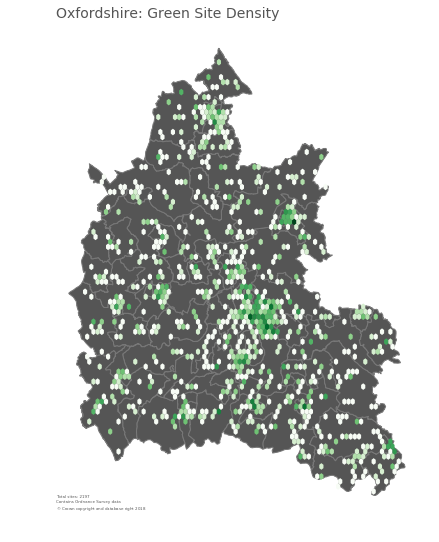

In [4]:
plt.clf()
fig = plt.figure()
ax = fig.add_subplot(111, facecolor='w', frame_on=False)
ax.set_axis_off()
ax.set_aspect('equal')

# draw wards from polygons
df_wards.plot(ax=ax, color='#555555', edgecolor='#787878')

# the mincnt argument only shows cells with a value >= 1
# hexbin wants np arrays, not plain lists
hb = ax.hexbin(np.array(df_green['geometry'].map(lambda x: x.x)),
               np.array(df_green['geometry'].map(lambda x: x.y)),
               gridsize=75, 
               bins='log', 
               mincnt=1,
               edgecolor='none',
               alpha=1.,
               lw=0.2,
               cmap=plt.get_cmap('Greens'))

# copyright and source data info
smallprint = ax.text(
    0.01, 0.01,
    'Total sites: %s\nContains Ordnance Survey data\n$\copyright$ Crown copyright and database right 2018' % len(df_green),
    ha='left', va='bottom',
    size=4,
    color='#555555',
    transform=ax.transAxes)

maptitle = ax.text(
    0.01, 1.01,
    'Oxfordshire: Green Site Density',
    ha='left', va='bottom',
    size=14,
    color='#555555',
    transform=ax.transAxes)

plt.tight_layout()
# this will set the image width to 722px at 100dpi
fig.set_size_inches(8, 8)
plt.savefig('images/oxon_green_hexbin.png', dpi=300, alpha=True)
plt.show()